# Comprehensive Analysis of our Strategy


## Preparation

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob 
import csv
import traceback
import datetime
import os
pd.options.display.max_columns=50
var = 'norm-precision'
import matplotlib.pyplot as plt

from collections import defaultdict
%matplotlib inline

In [19]:
def extract (prefixes, props = ['data', 'sampling', 'subsamplings',  'ada_decay', 'current_weights']):
    results = []
    for prefix in prefixes:
        results += glob.glob(f'../results/performances/{prefix}*')  # quick- or www21- or fld-
    list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))


    full_results = defaultdict(list)

    # Retrieving results
    num_logs = len([i for i in list1 if i > 1000])
    count= 0
    for i in range(1,num_logs+1):
        try:
            df = pd.read_csv(list2[-i])
            rolling_mean7 = df[var].rolling(window=7).mean()
            rolling_mean14 = df[var].rolling(window=14).mean()
            filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
            info = ','.join([str(x) for x in df[props].iloc[0]])
            full_results[info].append(rolling_mean14)
            count += 1

        except:
            print('loading error:', list2[-i])
            continue
    print(count)
    return full_results

In [20]:
def extract_weights (prefixes, props = ['data', 'sampling', 'subsamplings',  'ada_decay', 'current_weights']):
    results = []
    for prefix in prefixes:
        results += glob.glob(f'../results/performances/{prefix}*')  # quick- or www21- or fld-
    list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))


    full_results = defaultdict(list)
    weights = defaultdict(dict)

    # Retrieving results
    num_logs = len([i for i in list1 if i > 1000])
    count= 0
    for i in range(1,num_logs+1):
        try:
            df = pd.read_csv(list2[-i])
            filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
            dataname = df['data'].iloc[0]
            weights[(filename, dataname)] = df['current_weights'].map(lambda x: float(x.split('/')[1])).rolling(window=14).mean()
            count += 1
    
        except:
            print('loading error:', list2[-i])
            continue
    print(count)
    return weights

In [21]:
def draw_weights(weights, ind = 6):
    keys = list(weights.keys())
    runid = keys[ind][0]
    data = keys[ind][1]
    fig = plt.figure(figsize=(16,8))

    n = weights[(runid, data)].shape[0]
    plt.plot(weights[(runid, data)])
    plt.ylabel('Exploration')
    plt.xlabel('numWeeks')
    # ax2.set_xticks(np.arange(0, n, 10))
    # ax2.set_xticklabels(np.arange(0, n, 10))
    plt.hlines(0.275, 0, 260, linestyles ="dotted", colors ="k") 
    plt.xticks(ticks=[-5,47,99,151,203,255], labels=['2013', 14, 15, 16,17, 18], fontsize=15)

    plt.show()
    plt.close()

In [22]:
def draw(full_results, data = 'real-n', 
            cond = lambda x: True, 
            label2key = lambda x: x,
            title = '<Tdata> Train: 1 months, Valid: 28 days, Test: 7 days, direct decay'):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # info = ','.join(list(df[['data', 'samplings']].iloc[0]))
    plt.style.use('seaborn-dark')

    result_one_dataset = sorted([key for key in full_results.keys() if data in key and cond(key)])
    colors = sns.color_palette("icefire", len(result_one_dataset))
    ax.set_prop_cycle('color', colors)
    print('The number of trials for each setting (Results are averaged):')
    for key in result_one_dataset:
        avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    #     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
        print(key, len(full_results[key]), round(np.mean(avg_result[-200:]), 4), round(np.mean(avg_result[-100:]), 4),      
        round(np.mean(avg_result[-50:]), 4),round(np.mean(avg_result[-13:]), 4))
        ax.plot(avg_result.index, avg_result, label=label2key(key))

    # # printing test_illicit_rate
    # tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
    # plt.plot(tir.index, tir, label='Test illicit rate (ref)')

    plt.title(title)

    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    # plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
    plt.ylabel(var, fontsize=15)
    plt.xlabel('Year', fontsize=15)
    plt.xticks(ticks=[-5,47,99,151,203,255], labels=['2013', 14, 15, 16,17, 18], fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(title, fontsize=15)
    plt.ylabel('Precision@10%', fontsize=15)

    # plt.ylim(0.1,0.7)



In [23]:
def label(key):
    if key.startswith('real-n,hybrid,xgb/random'):
        return f'hybrid, {int(float(key[-7:-4])*100)}% exploration'
    if key.startswith('real-n,adahybrid,xgb/random,exp3'):
        return f'exp3'
    if key.startswith('real-n,pot'):
        return f'optimal transport'
    if key.startswith('real-n,rada'):
        return f'rada'


## Exp 1. Hybrid [main-all]

220
The number of trials for each setting (Results are averaged):
real-n,hybrid,xgb/random,-,-,-,0.0/1.0 5 0.1007 0.1012 0.1006 0.1003
real-n,hybrid,xgb/random,-,-,-,0.1/0.9 5 0.2525 0.2381 0.2335 0.2203
real-n,hybrid,xgb/random,-,-,-,0.2/0.8 5 0.2975 0.2487 0.2371 0.224
real-n,hybrid,xgb/random,-,-,-,0.3/0.7 5 0.3066 0.2484 0.2321 0.2288
real-n,hybrid,xgb/random,-,-,-,0.4/0.6 5 0.3051 0.2424 0.2256 0.2148
real-n,hybrid,xgb/random,-,-,-,0.5/0.5 5 0.7228 0.7419 0.7928 0.8093
real-n,hybrid,xgb/random,-,-,-,0.6/0.4 5 0.7454 0.7639 0.8127 0.8263
real-n,hybrid,xgb/random,-,-,-,0.7/0.3 5 0.7633 0.7822 0.8305 0.8399
real-n,hybrid,xgb/random,-,-,-,0.8/0.2 5 0.7765 0.7971 0.8424 0.8485
real-n,hybrid,xgb/random,-,-,-,0.9/0.1 5 0.791 0.812 0.8508 0.8541
real-n,hybrid,xgb/random,-,-,-,1.0/0.0 5 0.8006 0.8227 0.86 0.8684


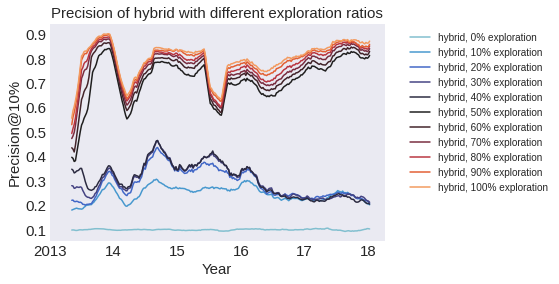

In [25]:
full_results = extract(['main-all'], ['data', 'sampling', 'subsamplings', 'ada_algo', 'ada_discount', 'ada_decay', 'current_weights'])
draw(full_results, label2key = label, title = 'Precision of hybrid with different exploration ratios')

## Exp 2: Rada

265
The number of trials for each setting (Results are averaged):
real-n,hybrid,xgb/random,-,-,-,-,0.0/1.0 5 0.1007 0.1012 0.1006 0.1003
real-n,hybrid,xgb/random,-,-,-,-,0.1/0.9 5 0.2525 0.2381 0.2335 0.2203
real-n,hybrid,xgb/random,-,-,-,-,1.0/0.0 5 0.8006 0.8227 0.86 0.8684
real-n,rada,xgb/random,exp3s,decay,0.9,balance,0.9/0.1 5 0.769 0.7898 0.8378 0.8466


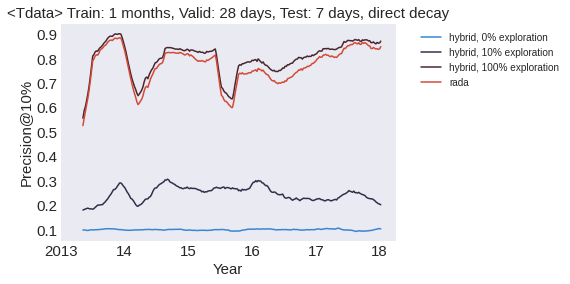

In [26]:
cond = lambda key: 'exp3s' in key or '0.1/0.9' in key or '1.0/0.0' in key or '0.0/1.0' in key
full_results = extract(['rada-', 'main-all'], ['data', 'sampling', 'subsamplings', 'ada_algo', 'ada_discount', 'ada_decay', 'mixing',  'current_weights'])
draw(full_results, cond=cond, label2key = label)

## Exp 3: Ablation

130
The number of trials for each setting (Results are averaged):
real-n,adahybrid,xgb/random,exp3s,decay,0.9,-,0.9/0.1 5 0.5282 0.5152 0.5447 0.506
real-n,pot,xgb/random,-,-,-,-,0.9/0.1 5 0.7682 0.7899 0.8372 0.847
real-n,rada,xgb/random,exp3s,decay,0.9,balance,0.9/0.1 5 0.769 0.7898 0.8378 0.8466


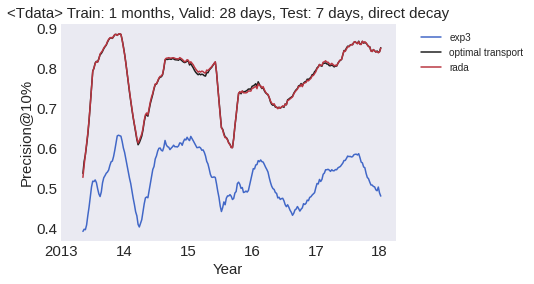

In [27]:
cond = lambda key: 'exp3s' in key or 'pot' in key
full_results = extract(['rada-', 'main-cd', 'ada'], ['data', 'sampling', 'subsamplings', 'ada_algo', 'ada_discount', 'ada_decay', 'mixing',  'current_weights'])
draw(full_results, cond=cond, label2key = label)